In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\Jacobi\\thin_jacobi_nodes_tcp'

In [2]:
def get_averages(filename):
    colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
    data_frame = pd.read_csv(filename, names=colnames, header=None)
    averages = data_frame.mean(axis=0)
    return round(averages, 3)

In [3]:
filenames = ['thin_jacobi_strong_nodes_tcp_1.csv', 'thin_jacobi_strong_nodes_tcp_8.csv', 'thin_jacobi_strong_nodes_tcp_24.csv', 'thin_jacobi_strong_nodes_tcp_30.csv', 'thin_jacobi_strong_nodes_tcp_48.csv']
Maxtimes = []
Mintimes = []
JacobiMin = []
JacobiMax = []
Residuals = []
MLUPs = []

for filename in filenames:
    averages = get_averages(filename)
    Maxtimes.append(averages[0])
    Mintimes.append(averages[1])
    JacobiMin.append(averages[2])
    JacobiMax.append(averages[3])
    Residuals.append(averages[4])
    MLUPs.append(averages[5])

Maxtimes = np.array(Maxtimes)
Mintimes = np.array(Mintimes)
JacobiMax = np.array(JacobiMax)
JacobiMin = np.array(JacobiMin)
Residuals = np.array(Residuals)
MLUPs = np.array(MLUPs)

In [8]:
Maxtimes

array([15.335,  1.966,  0.662,  0.53 ,  0.346])

MLUPs as output of the program

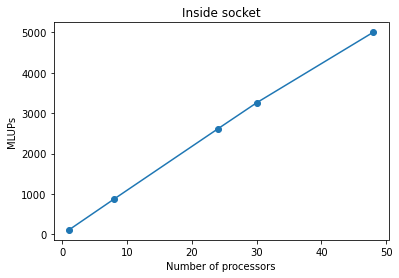

In [5]:
N = np.array([1,8,24,30,48])

plt.figure()
plt.scatter(N, MLUPs)
plt.plot(N,MLUPs)
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("MLUPs")
plt.show()

Total runtime

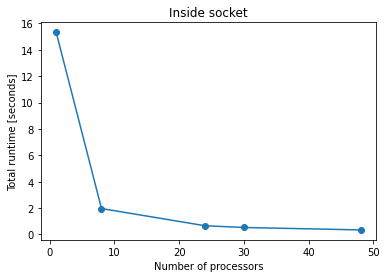

In [6]:


plt.figure()
plt.scatter(N, Maxtimes)
plt.plot(N, Maxtimes)
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("Total runtime [seconds]")
plt.show()


Speedup

In [11]:
speedup_infiniband = np.array([ 1.        ,  3.98907388,  7.84347826, 11.74119449, 15.64693878,
       23.375     , 44.06321839])
speedup_infiniband
N_infin = np.array([1,4,8,12,16,24,48])

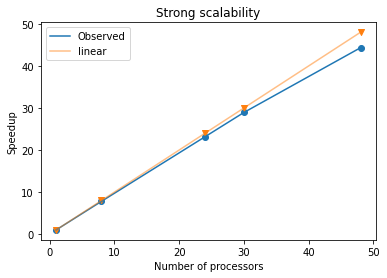

In [15]:
speedup = np.divide(Maxtimes[0], Maxtimes)

plt.figure()
plt.scatter(N, speedup)
plt.plot(N, speedup, label='Observed')
plt.scatter(N,N, marker="v")
plt.plot(N,N, label = 'linear', alpha=0.5)
#plt.scatter(N_infin, speedup_infiniband, marker="s")
#plt.plot(N_infin, speedup_infiniband, label='Infiniband')
plt.title('Strong scalability')
plt.xlabel("Number of processors")
plt.ylabel("Speedup")
plt.legend()
plt.show()

Efficiency

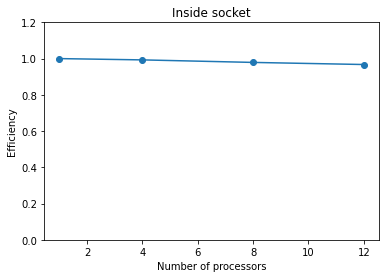

In [55]:
efficiency = np.divide(speedup, N)

plt.figure()
plt.scatter(N, efficiency)
plt.plot(N, efficiency)
plt.ylim((0,1.2))
plt.title('Inside socket')
plt.xlabel("Number of processors")
plt.ylabel("Efficiency")
plt.show()

In [72]:
L = 120

def fun(N):
    return N ** (1. / 3) * L

N = np.array([2,4,6,8,10,12,16,20,24,48,64,96])

weak_L = np.round(fun(N), 0)
weak_L

array([151., 190., 218., 240., 259., 275., 302., 326., 346., 436., 480.,
       549.])